# Decision_Trees _0n_titanic


Written by: M.Danish Azeem\
Date: 01.18.2024\
Email: danishazeem365@gmail.com

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# other
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree

In [9]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
x = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = df['survived']

In [11]:
x = pd.get_dummies(x, columns=['sex'])   # lable in coding

In [12]:
x.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [13]:
x.age.fillna(value= x['age'].mean(), inplace=True)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
y_pred = model.predict(x_test)

In [17]:
# from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# precision = (y_test, y_pred)
# recall = (y_test, y_pred)
# f1 = (y_test, y_pred)

# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-Score:", f1)


In [18]:
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.7821229050279329


In [42]:
tree.plot_tree(model.fit(x,y), filled=True)
plt.show()
plt.savefig("treee.png")

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got SVC() instead.

In [43]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(25,20))
tree.plot_tree(model.fit(x,y), filled=True) 
plt.show()
plt.savefig("decision_tree.pdf", format="pdf", dpi=300)                   

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got SVC() instead.

<Figure size 2500x2000 with 0 Axes>

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_test,y_pred)


0.6956521739130435

In [22]:
recall_score(y_test,y_pred)


0.7272727272727273

In [23]:
f1_score(y_test,y_pred)


0.711111111111111

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[92, 21],
       [18, 48]], dtype=int64)

Text(0.5, 23.52222222222222, 'precision lable')

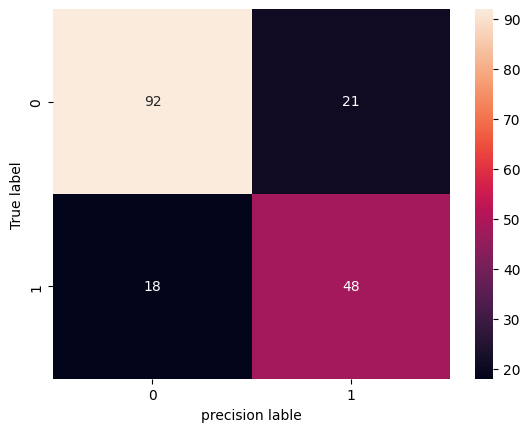

In [25]:
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('precision lable')

# K Nearest Neighbours (KNN)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[90, 23],
       [32, 34]], dtype=int64)

In [27]:
precision_score(y_test, y_pred)

0.5964912280701754

In [28]:
recall_score(y_test, y_pred)

0.5151515151515151

Text(0.5, 23.52222222222222, 'Precision lable')

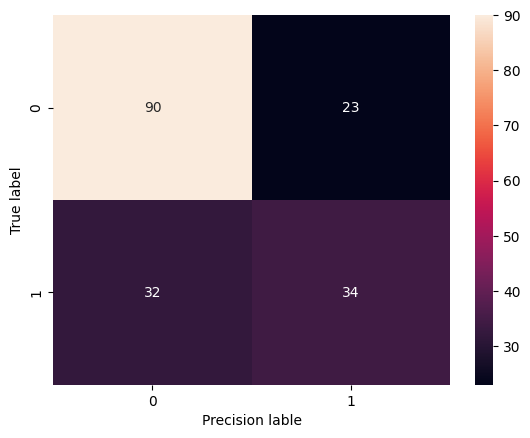

In [29]:
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Precision lable')

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("confusion_matrix: ", cm)
print("precision_score: ", precision_score(y_test, y_pred))
print("recall_score: ",recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

confusion_matrix:  [[101  12]
 [ 16  50]]
precision_score:  0.8064516129032258
recall_score:  0.7575757575757576
F1 score:  0.7812499999999999


# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("confusion_matrix: ", cm)
print("precision_score: ", precision_score(y_test, y_pred))
print("recall_score: ",recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

confusion_matrix:  [[97 16]
 [24 42]]
precision_score:  0.7241379310344828
recall_score:  0.6363636363636364
F1 score:  0.6774193548387097


c:\Users\Danish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 # Support Vector Machines (SVM)

In [32]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("confusion_matrix: ", cm)
print("precision_score: ", precision_score(y_test, y_pred))
print("recall_score: ",recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

confusion_matrix:  [[98 15]
 [41 25]]
precision_score:  0.625
recall_score:  0.3787878787878788
F1 score:  0.4716981132075471


# Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("confusion_matrix: ", cm)
print("precision_score: ", precision_score(y_test, y_pred))
print("recall_score: ",recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

confusion_matrix:  [[95 18]
 [23 43]]
precision_score:  0.7049180327868853
recall_score:  0.6515151515151515
F1 score:  0.6771653543307087


In [47]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the models to be evaluated
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), SVC()]
names = ["Logistic Regression", "KNN", "Random Forest", "SVM"]

# Perform k-fold cross-validation for each model
k = 10

for name, model in zip(names, models):
    # Calculate cross-validated scores for precision, recall, and F1-score
    cv_precision = cross_val_score(model, x_train, y_train, cv=k, scoring='precision')
    cv_recall = cross_val_score(model, x_train, y_train, cv=k, scoring='recall')
    cv_f1 = cross_val_score(model, x_train, y_train, cv=k, scoring='f1')

    # Print the results
    print(f"{name} CV Precision: {np.mean(cv_precision):.3f} +/- {np.std(cv_precision):.3f}")
    print(f"{name} CV Recall: {np.mean(cv_recall):.3f} +/- {np.std(cv_recall):.3f}")
    print(f"{name} CV F1-score: {np.mean(cv_f1):.3f} +/- {np.std(cv_f1):.3f}")


c:\Users\Danish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Danish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression CV Precision: 0.760 +/- 0.034
Logistic Regression CV Recall: 0.703 +/- 0.075
Logistic Regression CV F1-score: 0.727 +/- 0.041
KNN CV Precision: 0.629 +/- 0.100
KNN CV Recall: 0.572 +/- 0.125
KNN CV F1-score: 0.598 +/- 0.113
Random Forest CV Precision: 0.768 +/- 0.097
Random Forest CV Recall: 0.717 +/- 0.055
Random Forest CV F1-score: 0.731 +/- 0.068
SVM CV Precision: 0.667 +/- 0.090
SVM CV Recall: 0.326 +/- 0.099
SVM CV F1-score: 0.431 +/- 0.098


In [37]:
# libraries and model import
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# define the models to be evaluated
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), SVC()]
names = ["Logistic Regression", "KNN", "Random Forest", "SVM"]
# perform k-fold cross-validation for each model
k = 10

for name, model in zip(names, models):
    # Indent the following lines for the for loop's body
    cv_scores = cross_val_score(model, x_train, y_train, cv=k)
    print(f"{name} CV accuracy: {np.mean(cv_scores):.3f} +/- {np.std(cv_scores):.3f}")


c:\Users\Danish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Danish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression CV accuracy: 0.798 +/- 0.025
KNN CV accuracy: 0.706 +/- 0.071
Random Forest CV accuracy: 0.813 +/- 0.051
SVM CV accuracy: 0.674 +/- 0.043


# Hyper parameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1, 10]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.79


# Assignment # 1

## Time stamp 01:10:32

### How to select the best model from 6 models: Logistic Regression, Decision Trees, Random Forest, Support Vector Machines (SVM), K-Nearest Neighbors (KNN), Naive Bayes

```python
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Assuming X_train, y_train are your training data and labels

# Logistic Regression
logreg = LogisticRegression()
logreg_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
logreg_accuracy = np.mean(logreg_scores)

# Decision Trees
dtree = DecisionTreeClassifier()
dtree_scores = cross_val_score(dtree, X_train, y_train, cv=5, scoring='accuracy')
dtree_accuracy = np.mean(dtree_scores)

# Random Forest
rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
rf_accuracy = np.mean(rf_scores)

# Support Vector Machines (SVM)
svm = SVC()
svm_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
svm_accuracy = np.mean(svm_scores)

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
knn_accuracy = np.mean(knn_scores)

# Naive Bayes
nb = GaussianNB()
nb_scores = cross_val_score(nb, X_train, y_train, cv=5, scoring='accuracy')
nb_accuracy = np.mean(nb_scores)

# Compare accuracies
models = {
    'Logistic Regression': logreg_accuracy,
    'Decision Trees': dtree_accuracy,
    'Random Forest': rf_accuracy,
    'SVM': svm_accuracy,
    'KNN': knn_accuracy,
    'Naive Bayes': nb_accuracy
}

best_model = max(models, key=models.get)
print(f"The best model is: {best_model} with an accuracy of {models[best_model]}")



# Assignment # 1

# Time stamp  01:10:32

# Replace the CV accuracy by precision Schore, recall, and f1  changing give me the code



```markdown
```python
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

# Define the models to be evaluated
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), SVC()]
names = ["Logistic Regression", "KNN", "Random Forest", "SVM"]

# Perform k-fold cross-validation for each model
k = 10

for name, model in zip(names, models):
    # Calculate cross-validated scores for precision, recall, and F1-score
    cv_precision = cross_val_score(model, x_train, y_train, cv=k, scoring='precision')
    cv_recall = cross_val_score(model, x_train, y_train, cv=k, scoring='recall')
    cv_f1 = cross_val_score(model, x_train, y_train, cv=k, scoring='f1')

    # Print the results
    print(f"{name} CV Precision: {np.mean(cv_precision):.3f} +/- {np.std(cv_precision):.3f}")
    print(f"{name} CV Recall: {np.mean(cv_recall):.3f} +/- {np.std(cv_recall):.3f}")
    print(f"{name} CV F1-score: {np.mean(cv_f1):.3f} +/- {np.std(cv_f1):.3f}")
